In [1]:
# IMports
import datetime
import csv
import pandas as pd
import seaborn
import matplotlib.pyplot as plt
import numpy as np
import json

In [2]:
IMAGE_SIZE = 256

def sq_to_rec(xs, ys, w, h):
    x_rec = (xs * w / IMAGE_SIZE).astype(int)
    y_rec = (ys * h / IMAGE_SIZE).astype(int)
    return x_rec, y_rec
def rmse(df, y_true_list):
    y_true_arr = np.column_stack(y_true_list)  # shape: (n_samples, n_targets)
    return np.sqrt(np.mean((df.values - y_true_arr) ** 2))

def mad(df, y_true_list):
    y_true_arr = np.column_stack(y_true_list)
    return np.mean(np.abs(df.values - y_true_arr))

In [3]:
dir = "./DATAFINAL/cam_certainity/without_prime/"

# Error in camera position told to robot
df_camuncertain_p = pd.read_csv(f'{dir}true_flat_bumpy_left_offset_proportional_uncertain_13081015.csv')
df_camuncertain_r = pd.read_csv(f'{dir}true_flat_bumpy_left_offset_robust_uncertain_13081016.csv')
df_camcertain_p = pd.read_csv(f'{dir}true_flat_bumpy_left_offset_proportional_certain_13081018.csv')
df_camcertain_r = pd.read_csv(f'{dir}true_flat_bumpy_left_offset_robust_certain_13081017.csv')



# df_ML_p = pd.read_csv(f'{dir}ML_flat_smooth_left_proportional_11081724.csv')
# df_ML_r = pd.read_csv(f'{dir}ML_flat_smooth_left_robust_11081725.csv')
# df_true_p = pd.read_csv(f'{dir}true_flat_smooth_left_proportional_11081716.csv')
# df_true_r = pd.read_csv(f'{dir}true_flat_smooth_left_robust_11081717.csv')
# df_true_p = pd.read_csv(f'{dir}true_pitch_bumpy_left_robust_12081910.csv')
# df_true_r = pd.read_csv(f'{dir}true_pitch_bumpy_left_proportional_12081909.csv')

In [ ]:
# dir2 = "./DATAFINAL/prop_vs_robust/"
# df_l_p = pd.read_csv(f"{dir2}ML_pitch_bumpy_left_proportional_11081751.csv")
# df_l_r = pd.read_csv(f"{dir2}ML_pitch_bumpy_left_robust_11081750.csv")
# df_r_p = pd.read_csv(f"{dir2}ML_pitch_bumpy_right_proportional_11081752.csv")
# df_r_r = pd.read_csv(f"{dir2}ML_pitch_bumpy_right_robust_11081749.csv")

In [ ]:
# # df_ML Has range of x 0-256 and y 0-256.. lets fix
# df_ML_p['xv'], df_ML_p['yv'] = sq_to_rec(df_ML_p['xv'], df_ML_p['yv'], 848, 480)
# df_ML_r['xv'], df_ML_r['yv'] = sq_to_rec(df_ML_r['xv'], df_ML_r['yv'], 848, 480)
# for d in [df_ML_p, df_ML_r]:
#     d.insert(len(d.columns) - 1, 'v', 1.0)
#     d['w'] = np.clip(d['w'], -np.pi/8, np.pi/8)

In [ ]:
# df_ML Has range of x 0-256 and y 0-256.. lets fix
for d in [df_true_p, df_true_r]:
    d.insert(len(d.columns) - 1, 'v', 1.0)
    d['w'] = np.clip(d['w'], -np.pi/8, np.pi/8)
    d['xv'], d['yv'] = sq_to_rec(d['xv'], d['yv'], 848, 480)


In [4]:
scale1 = len(df_camuncertain_p)/len(df_camuncertain_r)
scale2 = len(df_camcertain_p)/len(df_camcertain_r)

In [5]:
# ML and true have very different scales so find a factor and stic with it
df_camuncertain_p['time'] = df_camuncertain_p.index / 30
df_camuncertain_r['time'] = df_camuncertain_r.index *scale1 / 30
df_camcertain_p['time'] = df_camcertain_p.index / 30
df_camcertain_r['time'] = df_camcertain_r.index * scale2 / 30
# df_true_r['time'] = df_true_r.index * 1.619861986/ 30


for d in [df_camuncertain_p,df_camuncertain_r,df_camcertain_p, df_camcertain_r]:

    d["xv"] = d["xv"].clip(lower=0, upper=848)
    d["yv"] = d["yv"].clip(lower=0, upper=480)
    d["thetav"] = d["thetav"].clip(lower=-np.pi, upper=np.pi)

# df_ML_p['time'] = df_ML_p.index * 6.688622754 / 33
# df_ML_r['time'] = df_ML_r.index * 6.622754491 / 33


# df_l_p['time'] = df_l_p.index
# df_l_r['time'] = df_l_r.index
# df_r_p['time'] = df_r_p.index
# df_r_r['time'] = df_r_r.index

In [6]:
# Drop the first row
df_camuncertain_p = df_camuncertain_p.drop(df_camuncertain_p.index[0]).reset_index(drop=True)
df_camuncertain_r = df_camuncertain_r.drop(df_camuncertain_r.index[0]).reset_index(drop=True)
df_camcertain_p = df_camcertain_p.drop(df_camcertain_p.index[0]).reset_index(drop=True)
df_camcertain_r = df_camcertain_r.drop(df_camcertain_r.index[0]).reset_index(drop=True)



In [7]:
def plot_run(df, label1, df_prop, label2, run_name="Run", pad=0.05):
    def lim(series1, series2):
        # Small padding based on range
        ymin = min(series1.min(), series2.min())
        ymax = max(series1.max(), series2.max())
        yrange = ymax - ymin
        return ymin - yrange * pad, ymax + yrange * pad

    fig, axs = plt.subplots(2, 3, figsize=(15, 10))
    fig.suptitle(run_name, fontsize=16)
    
    # 1) x_v vs time
    axs[0, 0].plot(df['time'], df['xv'], label=label1, color='red')
    axs[0, 0].plot(df_prop['time'], df_prop['xv'], label=label2, color='blue')
    axs[0, 0].axhline(y=424, color='green', linestyle='--', label='Desired')
    axs[0, 0].set_xlabel('time'); axs[0, 0].set_ylabel('pixel')
    axs[0, 0].set_title(r'Image Coordinate, $x_v$', fontsize=14)
    axs[0, 0].set_ylim(*lim(df['xv'], df_prop['xv']))
    axs[0, 0].legend(loc='upper right', fontsize=10)

    # 2) y_v vs time
    axs[0, 1].plot(df['time'], df['yv'], color='red', label=label1)
    axs[0, 1].plot(df_prop['time'], df_prop['yv'], color='blue', label=label2)
    axs[0, 1].axhline(y=480, color='green', linestyle='--', label='Desired')
    axs[0, 1].set_xlabel('time'); axs[0, 1].set_ylabel('pixel')
    axs[0, 1].set_title(r'Image Coordinate, $y_v$', fontsize=14)
    # axs[0, 1].set_ylim(*lim(df['yv'], df_prop['yv']))
    axs[0, 1].set_ylim(0, 510)
    axs[0, 1].legend(loc='upper right', fontsize=10)

    # 3) theta_v vs time
    axs[0, 2].plot(df['time'], df['thetav'], color='red', label=label1)
    axs[0, 2].plot(df_prop['time'], df_prop['thetav'], color='blue', label=label2)
    axs[0, 2].axhline(y=0, color='blue', linestyle='--', label='Desired')
    axs[0, 2].set_xlabel('time'); axs[0, 2].set_ylabel('pixel')
    axs[0, 2].set_title(r'Image Coordinate, $\theta_v$', fontsize=14)
    axs[0, 2].set_ylim(-np.pi, np.pi)
    axs[0, 2].legend(loc='upper right', fontsize=10)

    # 4) x pose vs time
    axs[1, 0].plot(df['time'], df['x'], color='red', label=label1)
    axs[1, 0].plot(df_prop['time'], df_prop['x'], color='blue', label=label2)
    # axs[1, 0].axhline(y=-16.436688, color='blue', linestyle='--', label='Desired')
    axs[1, 0].axhline(y=0.967484, color='green', linestyle='--', label='Desired')
    axs[1, 0].set_xlabel('time'); axs[1, 0].set_ylabel('x')
    axs[1, 0].set_title('Robot pose, x', fontsize=14)
    axs[1, 0].set_ylim(*lim(df['x'], df_prop['x']))
    axs[1, 0].legend(loc='upper right', fontsize=10)

    # 5) Trajectory (y vs x) — dynamic both xlim and ylim
    axs[1, 1].plot(df['y'], df['x'], color='red', label=label1)
    axs[1, 1].plot(df_prop['y'], df_prop['x'], color='blue', label=label2)
    # axs[1, 1].axhline(y=-16.436688, color='green', linestyle='--', label='Desired')
    axs[1, 1].axhline(y=0.967484, color='green', linestyle='--', label='Desired')
    axs[1, 1].set_xlabel('x'); axs[1, 1].set_ylabel('x')
    axs[1, 1].set_title('Trajectory')
    axs[1, 1].set_ylim(*lim(df['x'], df_prop['x']))
    axs[1, 1].set_xlim(*lim(df['y'], df_prop['y']))
    axs[1, 1].legend(loc='upper right', fontsize=10)

    # 6) omega vs time
    axs[1, 2].plot(df['time'], df['w_prime'], color='red', label=label1)
    axs[1, 2].plot(df_prop['time'], df_prop['w_prime'], color='blue', label=label2)
    axs[1, 2].axhline(y=0, color='blue', linestyle='--', label='Desired')
    axs[1, 2].set_xlabel('time'); axs[1, 2].set_ylabel('pixel')
    axs[1, 2].set_title(r'Control signal, $\omega$', fontsize=14)
    axs[1, 2].set_ylim(*lim(df['w_prime']-1, df_prop['w_prime']+1))
    axs[1, 2].legend(loc='upper right', fontsize=10)

    plt.tight_layout()
    plt.show()


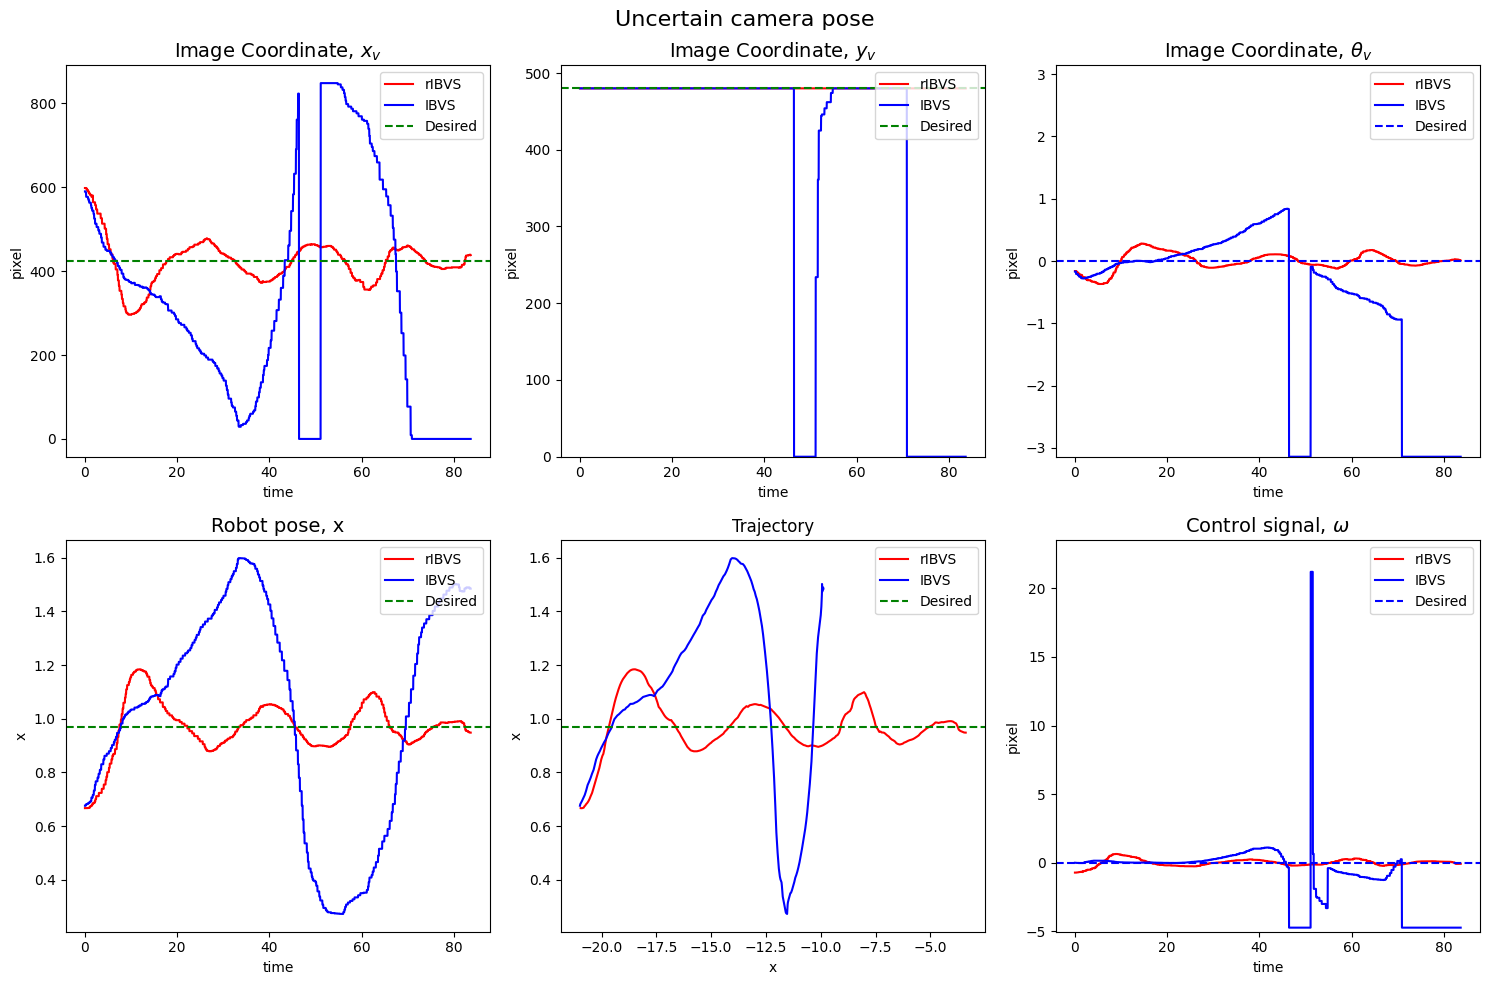

In [8]:
plot_run(df_camuncertain_r, "rIBVS", df_camuncertain_p, "IBVS", "Uncertain camera pose")

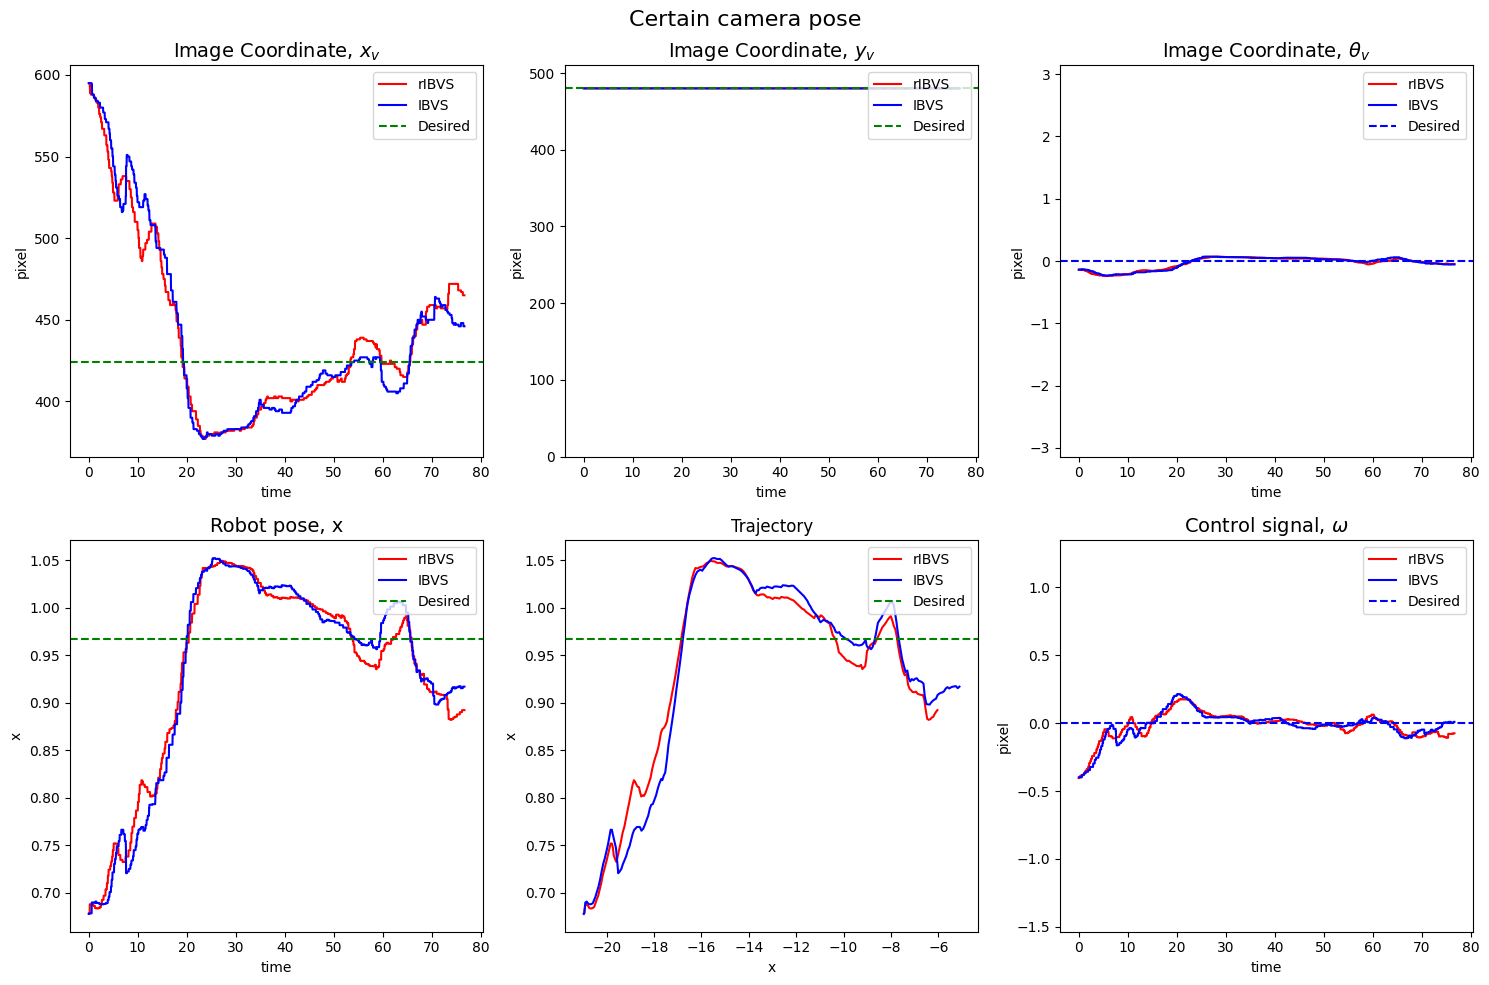

In [9]:
plot_run(df_camcertain_r, "rIBVS", df_camcertain_p, "IBVS", "Certain camera pose")


In [ ]:
plot_run(df_r_r, "rIBVS", df_r_p, "IBVS", "Right")

In [ ]:
plot_run(df_ML_p,"ML", df_true_p, "TrueLine", "Proportional")

In [ ]:
plot_run(df_ML_r,"ML", df_true_r, "TrueLine", "Robust")

In [ ]:
# # Time is not its own column, but each row is a time step of 0.02 seconds
# plt.figure(figsize=(15, 15))
# plt.subplot(3, 3, 1)
# plt.plot(df['time'], df['xv'], color='red')
# plt.plot(df_prop['time'], df_prop['xv'], color='blue')
# plt.axhline(y=128, color='green', linestyle='--', label='Center')
# plt.xlabel('time')
# plt.ylabel('pixel')
# plt.title(r'Image Coordinate, $x_v$', fontsize=14)
# plt.ylim(0, 256)
# plt.legend(['rIBVS', 'proportional', 'Center'], loc='upper right', fontsize=10)

# plt.subplot(3, 3, 2)
# plt.plot(df['time'], df['yv'], color='red')
# plt.plot(df_prop['time'], df_prop['yv'], color='blue')
# plt.axhline(y=256, color='green', linestyle='--', label='Center')
# plt.xlabel('time')
# plt.ylabel('pixel')
# plt.title(r'Image Coordinate, $y_v$', fontsize=14)
# plt.ylim(200,300)
# plt.legend(['rIBVS', 'proportional', 'Center'], loc='upper right', fontsize=10)

# plt.subplot(3, 3, 3)
# plt.plot(df['time'], df['thetav'], color='red')
# plt.plot(df_prop['time'], df_prop['thetav'], color='blue')
# plt.axhline(y=0, color='blue', linestyle='--', label='Center')
# plt.xlabel('time')
# plt.ylabel('pixel')
# plt.title(r'Image Coordinate, $\theta_v$', fontsize=14)
# plt.ylim(-np.pi/4, np.pi/4)
# plt.legend(['rIBVS', 'proportional', 'Center'], loc='upper right', fontsize=10)


# plt.subplot(3, 3, 4)
# plt.plot(df['time'], df['x'], color='red')
# plt.plot(df_prop['time'], df_prop['x'], color='blue')
# plt.axhline(y=0, color='blue', linestyle='--', label='Center')
# plt.xlabel('time')
# plt.ylabel('pixel')
# plt.title('Robot pose, x', fontsize=14)
# plt.ylim(0, 2)
# plt.legend(['rIBVS', 'IBVS', 'Center'], loc='upper right', fontsize=10)


# plt.subplot(3, 3, 5)
# plt.plot(df['y'], df['x'], color='red')
# plt.plot(df_prop['y'], df_prop['x'], color='blue')
# plt.axhline(y=-0.68, color='green', linestyle='--', label='Center')
# plt.xlabel('y')
# plt.ylabel('x')
# plt.title('Trajectory')
# plt.xlim(df['y'].min() - 0.1, df['y'].max() + 0.1)
# plt.ylim(df['x'].min() - 0.1, df['x'].max() + 0.1)
# plt.legend(['rIBVS', 'IBVS', ''], loc='upper right', fontsize=10)


# plt.subplot(3, 3, 6)
# plt.plot(df['time'], df['w'], color='red')
# plt.plot(df_prop['time'], df_prop['w'], color='blue')
# plt.axhline(y=0, color='blue', linestyle='--', label='Center')
# plt.xlabel('time')
# plt.ylabel('pixel')
# plt.title(r'Control signal, $\omega$', fontsize=14)
# plt.ylim(-np.pi/2, np.pi/2)
# plt.legend(['rIBVS', 'proportional', 'Center'], loc='upper right', fontsize=10)


# plt.tight_layout()
# plt.show()

### To get RMSE out of these data :D

In [16]:
# Set goal values for each world
# roll world
# xd_roll = 1.005811
# yd_roll =  Driving along the y axis
# Pitch world
# xd_pitch = Driving along the x axis
# yd_pitch = -16.434568

# Flat world
# xd_flat =  1.005811
xd_flat =  0.967484
# yd_flat = Drving along this guy

# The goal for the image features, same for all
xv_star = 424
yv_star = 480
thetav_star = 0 

In [17]:
# cam certainity

x_star = 0.967484 
camuncertain_p_rmse = rmse(df_camuncertain_p[['xv', 'yv', 'thetav', 'x']], [xv_star, yv_star, thetav_star, x_star])
camuncertain_r_rmse = rmse(df_camuncertain_r[['xv', 'yv', 'thetav', 'x']], [xv_star, yv_star, thetav_star, x_star])

camcertain_p_rmse = rmse(df_camcertain_p[['xv', 'yv', 'thetav', 'x']], [xv_star, yv_star, thetav_star, x_star])
camcertain_r_rmse = rmse(df_camcertain_p[['xv', 'yv', 'thetav', 'x']], [xv_star, yv_star, thetav_star, x_star])


cam_uncertain_p_mad = mad(df_camuncertain_p['w_prime'], [0])
cam_uncertain_r_mad = mad(df_camuncertain_r['w_prime'], [0])

cam_certain_p_mad = mad(df_camcertain_p['w_prime'], [0])
cam_certain_r_mad = mad(df_camcertain_r['w_prime'], [0])

In [13]:
results = {
    "camuncertain_p_rmse": camuncertain_p_rmse,
    "camuncertain_r_rmse": camuncertain_r_rmse,
    "camcertain_p_rmse": camcertain_p_rmse,
    "camcertain_r_rmse": camcertain_r_rmse,
    "cam_uncertain_p_mad": cam_uncertain_p_mad,
    "cam_uncertain_r_mad": cam_uncertain_r_mad,
    "cam_certain_p_mad": cam_certain_p_mad,
    "cam_certain_r_mad": cam_certain_r_mad
}

# Flatten Series into composite keys
flat_results = {}
for key, value in results.items():
    if isinstance(value, pd.Series):
        for subkey, subval in value.items():
            flat_results[f"{key}_{subkey}"] = subval
    else:
        flat_results[key] = value

# Save to CSV
pd.Series(flat_results).to_csv("cam_uncertainity.csv", header=["Value"])

In [22]:
def rmse_series(df_cols: pd.DataFrame, y_true_list):
    # df_cols has columns like ["xv","yv","thetav"]; y_true_list is [xv_star, yv_star, thetav_star]
    out = {}
    for name, y_true in zip(df_cols.columns, y_true_list):
        y_pred = df_cols[name].to_numpy()
        out[name] = float(np.sqrt(np.mean((y_pred - np.asarray(y_true))**2)))
    return pd.Series(out)

def make_block_from_series(rmse_ser: pd.Series, w_mad_val):
    inner = {f"rmse_{k}": float(v) for k, v in rmse_ser.items()}
    inner["w_mad"] = float(w_mad_val)
    return inner

# ==== compute per-axis RMSEs for each dataset (replace df_* and *_star with yours) ====
cols = ["xv", "yv", "thetav", "x"]

# ML_p_rmse_ser = rmse_series(df_ML_p[cols], [xv_star, yv_star, thetav_star,x_star])
# ML_r_rmse_ser = rmse_series(df_ML_r[cols], [xv_star, yv_star, thetav_star, x_star])
# true_p_rmse_ser = rmse_series(df_true_p[cols], [xv_star, yv_star, thetav_star,x_star])
# true_r_rmse_ser = rmse_series(df_true_r[cols], [xv_star, yv_star, thetav_star, x_star])

camuncertain_p_rmse_ser = rmse_series(df_camuncertain_p[['xv', 'yv', 'thetav', 'x']], [xv_star, yv_star, thetav_star, x_star])
camuncertain_r_rmse_ser = rmse_series(df_camuncertain_r[['xv', 'yv', 'thetav', 'x']], [xv_star, yv_star, thetav_star, x_star])
camcertain_p_rmse_ser = rmse_series(df_camcertain_p[['xv', 'yv', 'thetav', 'x']], [xv_star, yv_star, thetav_star, x_star])
camcertain_r_rmse_ser = rmse_series(df_camcertain_p[['xv', 'yv', 'thetav', 'x']], [xv_star, yv_star, thetav_star, x_star])

# cols = ["xv", "yv", "thetav", "y"]

# r_p_rmse_ser = rmse_series(df_r_p[cols], [xv_star, yv_star, thetav_star, y_star])
# r_r_rmse_ser = rmse_series(df_r_r[cols], [xv_star, yv_star, thetav_star, y_star])
# l_p_rmse_ser = rmse_series(df_l_p[cols], [xv_star, yv_star, thetav_star, y_star])
# l_r_rmse_ser = rmse_series(df_l_r[cols], [xv_star, yv_star, thetav_star, y_star])

# ==== build nested dict with per-axis keys + your existing w_mad scalars ====
# metrics_nested = {
#     "ML_p":  make_block_from_series(ML_p_rmse_ser,  ML_p_w_mad),
#     "ML_r":  make_block_from_series(ML_r_rmse_ser,  ML_r_w_mad),
#     "true_p": make_block_from_series(true_p_rmse_ser, true_p_w_mad),
#     "true_r": make_block_from_series(true_r_rmse_ser, true_r_w_mad),
#     "r_p":   make_block_from_series(r_p_rmse_ser,   r_p_w_mad),
#     "r_r":   make_block_from_series(r_r_rmse_ser,   r_r_w_mad),
#     "l_p":   make_block_from_series(l_p_rmse_ser,   l_p_w_mad),
#     "l_r":   make_block_from_series(l_r_rmse_ser,   l_r_w_mad)
# }
metrics_nested = {
    "cam_uncertain_p": make_block_from_series(camuncertain_p_rmse_ser, cam_uncertain_p_mad),
    "cam_uncertain_r": make_block_from_series(camuncertain_r_rmse_ser, cam_uncertain_r_mad),
    "cam_certain_p":   make_block_from_series(camcertain_p_rmse_ser,   cam_certain_p_mad),
    "cam_certain_r":   make_block_from_series(camcertain_r_rmse_ser,   cam_certain_r_mad),
}

with open("metrics_results_cam_uncertainty.json", "w") as f:
    json.dump(metrics_nested, f, indent=2)

print("Saved per-axis metrics to metrics_results.json")

Saved per-axis metrics to metrics_results.json


In [ ]:
x_star = 0.967484 
ML_p_rmse = rmse(df_ML_p[['xv', 'yv', 'thetav', 'x']], [xv_star, yv_star, thetav_star, x_star])
ML_r_rmse = rmse(df_ML_r[['xv', 'yv', 'thetav', 'x']], [xv_star, yv_star, thetav_star, x_star])
true_p_rmse = rmse(df_true_p[['xv', 'yv', 'thetav', 'x']], [xv_star, yv_star, thetav_star, x_star])
true_r_rmse = rmse(df_true_r[['xv', 'yv', 'thetav', 'x']], [xv_star, yv_star, thetav_star, x_star])
ML_p_w_mad = mad(df_ML_p['w'], [0])
ML_r_w_mad = mad(df_ML_r['w'], [0])
true_r_w_mad = mad(df_true_r['w'], [0])
true_p_w_mad = mad(df_true_p['w'], [0])

# print(ML_p_rmse,ML_r_rmse,true_p_rmse,true_p_rmse, ML_p_w_mad, ML_r_w_mad, true_p_w_mad, true_r_w_mad)

In [ ]:
results = {
    "ML_p_rmse": ML_p_rmse,
    "ML_r_rmse": ML_r_rmse,
    "true_p_rmse": true_p_rmse,
    "true_r_rmse": true_r_rmse,
    "ML_p_w_mad": ML_p_w_mad,
    "ML_r_w_mad": ML_r_w_mad,
    "true_p_w_mad": true_p_w_mad,
    "true_r_w_mad": true_r_w_mad
}

# Flatten Series into composite keys
flat_results = {}
for key, value in results.items():
    if isinstance(value, pd.Series):
        for subkey, subval in value.items():
            flat_results[f"{key}_{subkey}"] = subval
    else:
        flat_results[key] = value

# Save to CSV
pd.Series(flat_results).to_csv("ML_vs_true.csv", header=["Value"])

In [ ]:
y_star = -16.436688
r_p_rmse = rmse(df_r_p[['xv', 'yv', 'thetav', 'y']], [xv_star, yv_star, thetav_star, y_star])
r_r_rmse = rmse(df_r_r[['xv', 'yv', 'thetav', 'y']], [xv_star, yv_star, thetav_star, y_star])
l_p_rmse = rmse(df_l_p[['xv', 'yv', 'thetav', 'y']], [xv_star, yv_star, thetav_star, y_star])
l_r_rmse = rmse(df_l_r[['xv', 'yv', 'thetav', 'y']], [xv_star, yv_star, thetav_star, y_star])

r_p_w_mad = mad(df_r_p['w'], [0])
r_r_w_mad = mad(df_r_r['w'], [0])
l_p_w_mad = mad(df_l_p['w'], [0])
l_r_w_mad = mad(df_l_r['w'], [0])
# print(r_p_rmse,r_r_rmse,l_p_rmse, l_r_rmse, r_p_w_mad, r_r_w_mad, l_p_w_mad, l_r_w_mad)

In [ ]:
results = {
    "r_p_rmse": r_p_rmse,
    "r_r_rmse": r_r_rmse,
    "l_p_rmse": l_p_rmse,
    "l_r_rmse": l_r_rmse,

    "r_p_w_mad": r_p_w_mad,
    "r_r_w_mad": r_r_w_mad,
    "l_p_w_mad": l_p_w_mad,
    "l_r_w_mad": l_r_w_mad
}

# ==== Flatten Series into composite keys ====
flat_results = {}
for key, value in results.items():
    if isinstance(value, pd.Series):
        for subkey, subval in value.items():
            flat_results[f"{key}_{subkey}"] = subval
    else:
        flat_results[key] = value

# ==== Save to CSV ====
pd.Series(flat_results).to_csv("robust_vs_proportional.csv", header=["Value"])

In [ ]:
def make_block(rmse_series: pd.Series, w_mad):
    # Build inner dict like {"rmse_xv": ..., "rmse_yv": ..., "rmse_thetav": ..., "w_mad": ...}
    inner = {f"rmse_{k}": float(v) for k, v in rmse_series.items()}
    inner["w_mad"] = float(w_mad)
    return inner

metrics_nested = {
    "ML_p": make_block(ML_p_rmse, ML_p_w_mad),
    "ML_r": make_block(ML_r_rmse, ML_r_w_mad),
    "true_p": make_block(true_p_rmse, true_p_w_mad),
    "true_r": make_block(true_r_rmse, true_r_w_mad),
    "r_p": make_block(r_p_rmse, r_p_w_mad),
    "r_r": make_block(r_r_rmse, r_r_w_mad),
    "l_p": make_block(l_p_rmse, l_p_w_mad),
    "l_r": make_block(l_r_rmse, l_r_w_mad),
}

with open("metrics_results.json", "w") as f:
    json.dump(metrics_nested, f, indent=2)

In [ ]:
def rmse_series(df_cols: pd.DataFrame, y_true_list):
    # df_cols has columns like ["xv","yv","thetav"]; y_true_list is [xv_star, yv_star, thetav_star]
    out = {}
    for name, y_true in zip(df_cols.columns, y_true_list):
        y_pred = df_cols[name].to_numpy()
        out[name] = float(np.sqrt(np.mean((y_pred - np.asarray(y_true))**2)))
    return pd.Series(out)

def make_block_from_series(rmse_ser: pd.Series, w_mad_val):
    inner = {f"rmse_{k}": float(v) for k, v in rmse_ser.items()}
    inner["w_mad"] = float(w_mad_val)
    return inner

# ==== compute per-axis RMSEs for each dataset (replace df_* and *_star with yours) ====
cols = ["xv", "yv", "thetav", "x"]

ML_p_rmse_ser = rmse_series(df_ML_p[cols], [xv_star, yv_star, thetav_star,x_star])
ML_r_rmse_ser = rmse_series(df_ML_r[cols], [xv_star, yv_star, thetav_star, x_star])
true_p_rmse_ser = rmse_series(df_true_p[cols], [xv_star, yv_star, thetav_star,x_star])
true_r_rmse_ser = rmse_series(df_true_r[cols], [xv_star, yv_star, thetav_star, x_star])

cols = ["xv", "yv", "thetav", "y"]

r_p_rmse_ser = rmse_series(df_r_p[cols], [xv_star, yv_star, thetav_star, y_star])
r_r_rmse_ser = rmse_series(df_r_r[cols], [xv_star, yv_star, thetav_star, y_star])
l_p_rmse_ser = rmse_series(df_l_p[cols], [xv_star, yv_star, thetav_star, y_star])
l_r_rmse_ser = rmse_series(df_l_r[cols], [xv_star, yv_star, thetav_star, y_star])

# ==== build nested dict with per-axis keys + your existing w_mad scalars ====
metrics_nested = {
    "ML_p":  make_block_from_series(ML_p_rmse_ser,  ML_p_w_mad),
    "ML_r":  make_block_from_series(ML_r_rmse_ser,  ML_r_w_mad),
    "true_p": make_block_from_series(true_p_rmse_ser, true_p_w_mad),
    "true_r": make_block_from_series(true_r_rmse_ser, true_r_w_mad),
    "r_p":   make_block_from_series(r_p_rmse_ser,   r_p_w_mad),
    "r_r":   make_block_from_series(r_r_rmse_ser,   r_r_w_mad),
    "l_p":   make_block_from_series(l_p_rmse_ser,   l_p_w_mad),
    "l_r":   make_block_from_series(l_r_rmse_ser,   l_r_w_mad),
}

with open("metrics_results.json", "w") as f:
    json.dump(metrics_nested, f, indent=2)

print("Saved per-axis metrics to metrics_results.json")

### Training history

In [ ]:
# DF of history
history_df = pd.read_csv("./training_history/256px_500ep_erik_supplemented_2.csv")